In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage
from sklearn.decomposition import PCA

import os
%matplotlib inline

In [28]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\retina_python\\Modules')
except:
    os.chdir('Modules')
from time_shifted_PID import MIfunc
from time_shifted_PID import EqualState
from Spike_Generation import SG
from Spike_Generation import NL

In [29]:
exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210908\\SplitData\\'
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210720\\SplitData\\'
cn = 19

# PCA of TKs

In [30]:

Mean = 10
amp_list = [0.5,1,1.5,2,3]
WNSTA_list = []
ExpSTA_list = []
for amp in amp_list:
    filename = 'diode_WhiteNoise_mean='+str(Mean)+'_amp='+str(amp)+'_0'
    loadfiles = np.load(exp_folder+'STA\\STA_'+filename+'.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]
    WNSTA_list.append(STA_cell.copy())

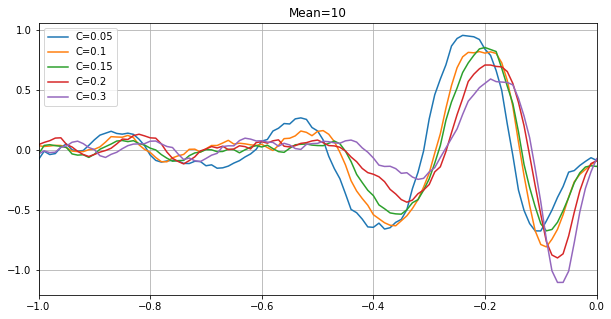

In [31]:
for i in range(len(amp_list)):
    plt.plot(timeshift, WNSTA_list[i][cn-1], label = 'C='+str(round(amp_list[i]/Mean,3)))

plt.legend()
plt.grid('on')
plt.xlim(-1,0)
plt.title('Mean='+str(Mean))
plt.gcf().set_size_inches(10,5)

In [32]:
X = np.zeros((101,5))
for i in range(len(amp_list)):
    X[:,i] = WNSTA_list[i][cn-1][:101]

In [33]:
pca=PCA(n_components=2)
PC = pca.fit(X).transform(X)

In [34]:
pca=PCA(n_components=2)
pca_struct = pca.fit(X)
PC = pca_struct.transform(X)

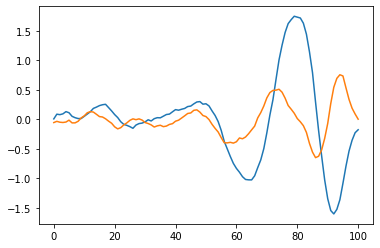

In [35]:
plt.plot(PC[:,0])
plt.plot(PC[:,1])

In [36]:
pca_corr = np.zeros((2,5))
for i in range(len(amp_list)):
    pca_corr[0,i] = np.sum(PC[:,0]*WNSTA_list[i][cn-1][:101])
    pca_corr[1,i] = np.sum(PC[:,1]*WNSTA_list[i][cn-1][:101])

Text(0, 0.5, 'PC2')

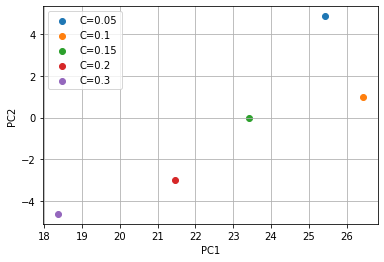

In [37]:
for i in range(len(amp_list)):
    plt.scatter(pca_corr[0,i], pca_corr[1,i], label = 'C='+str(round(amp_list[i]/Mean,3)))

plt.legend(loc='best')
plt.grid('on')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.xlim(-1,0)
# plt.title('Mean='+str(Mean))
# plt.gcf().set_size_inches(10,5)

# PCA of all (across different contrast) spike triggered

In [46]:
import warnings
warnings.simplefilter('ignore')

dt = 0.01
window = [-1,0] # second
stepshift = np.arange(window[0]/dt, window[1]/dt+1, dtype = int)

sampling_rate = 20000
STcollection_file = []
for amp in amp_list:
    filename = 'diode_WhiteNoise_mean='+str(Mean)+'_amp='+str(amp)+'_20-Jul-2021_0'
    annots = loadmat(exp_folder+filename, squeeze_me = True)
   
    TicTocer = annots['a_data'][1]
    startPoint = np.where(TicTocer>38000)[0][0]
    endPoint = np.where(TicTocer>38000)[0][-1]
    x = annots['a_data'][0, startPoint:endPoint+1]
    x = np.convolve(x, np.ones(int(sampling_rate*dt*0.5))/int(sampling_rate*dt*0.5), 'same')
    x = x[int(sampling_rate*dt*0.5)::int(sampling_rate*dt)]
    x = x.astype(float)
    x = ((x-np.mean(x))/np.std(x)*amp + 10)
    tEdge = np.arange(len(x)+1)*dt

    Spike = annots['Spikes'][cn-1]
    Spike = Spike[np.where(Spike>startPoint/sampling_rate)[0][0]:np.where(Spike<endPoint/sampling_rate)[0][-1]]-startPoint/sampling_rate
    rstate, _ = np.histogram(Spike, tEdge)
    
    STcollection = np.zeros((1,len(stepshift)))
    for i in np.arange(-stepshift[0],len(rstate)-stepshift[-1]):
        for spike in range(rstate[i]):
            STcollection = np.vstack((STcollection, x[i+stepshift]))
    
    STcollection_file.append(STcollection[1:,:])


In [47]:
allCollection = np.zeros((1,len(stepshift)))
for STcollection in STcollection_file:
    allCollection = np.vstack((allCollection, STcollection))
allCollection = allCollection[1:,:]

In [48]:
pca=PCA(n_components=2)
pca_struct = pca.fit(allCollection.T)
PC = pca_struct.transform(allCollection.T)

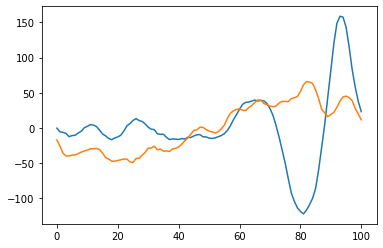

In [49]:
plt.plot(PC[:,0])
plt.plot(PC[:,1])

In [50]:
pca_corr_file = [np.vstack((np.sum(PC[:,0][np.newaxis,:]*STcollection, axis=1),np.sum(PC[:,1][np.newaxis,:]*STcollection, axis=1))) for STcollection in STcollection_file]

In [51]:
pca_corr_file

[array([[-1208.30616606, -1066.70627762,  -803.47696341,   468.00960397,
          -739.08051603,  -626.51546002, -1022.49863389,  -974.06169186,
          -601.09073783, -1398.58247191,  -961.33809954, -1102.21975177,
          -566.49741421,  -713.24054993, -1210.47564764,  -129.4498297 ,
          -806.47218261,   270.66248777, -1048.80052445,  -140.17768003,
          -157.14130684,  -248.70829655,  -786.62754547,  -508.90175607,
         -1000.11268167,  -740.50438389,  -740.50438389,   341.37242081,
         -1206.80266182,  -387.30705358,    93.2395615 , -1046.91600534,
          -203.20674698,  -733.50945594,   138.3198101 ,     3.86511094,
         -1357.95484666,  -866.20341374, -1581.68213355, -1581.68213355,
         -1446.77699934, -1446.77699934,     4.30941217,  -619.163333  ,
          -362.18687863,  -412.36572665,  -412.36572665, -1054.05804629,
         -1278.74534543, -1012.78322113,  -325.78301244,  -325.78301244,
          -325.78301244,   -33.75472982,   283.0283

Text(0, 0.5, 'PC2')

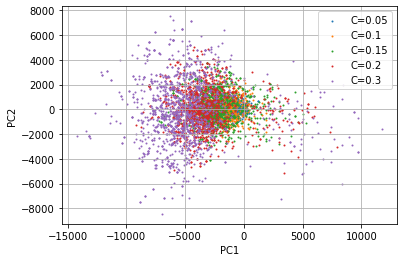

In [52]:
for i in range(len(amp_list)):
    plt.scatter(pca_corr_file[i][0,:], pca_corr_file[i][1,:], s=1, label = 'C='+str(round(amp_list[i]/Mean,3)))
    

plt.legend(loc='best')
plt.grid('on')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.xlim(-1,0)
# plt.title('Mean='+str(Mean))
# plt.gcf().set_size_inches(10,5)

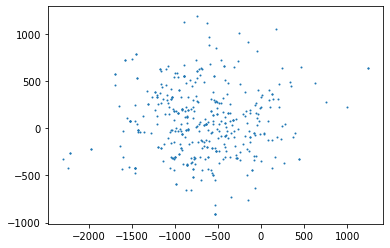

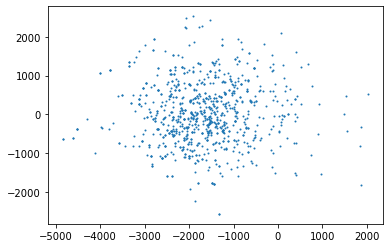

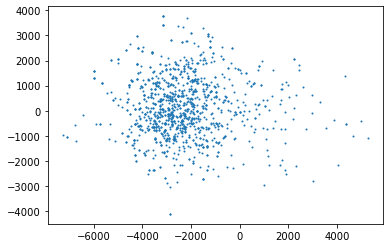

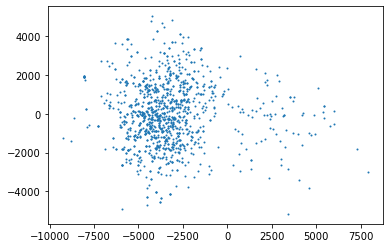

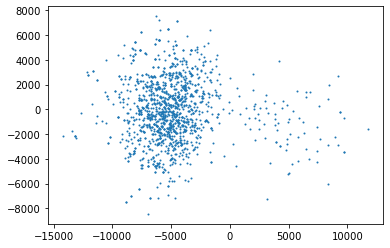

In [53]:
for i in range(len(amp_list)):
    plt.scatter(pca_corr_file[i][0,:], pca_corr_file[i][1,:], s=1, label = 'C='+str(round(amp_list[i]/Mean,3)))
    plt.show()